In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

2023-08-17 15:19:39.335259: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-17 15:19:39.449727: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-17 15:19:40.042967: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-17 15:19:40.047427: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-17 15:19:42.613216: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
biomass_history = pd.read_csv("data/Biomass_History.csv")
biomass_history.drop(["Index"],axis=1, inplace=True)
x_labels = ["Latitude","Longitude","2010","2011","2012","2013","2014","2015","2016","2017"]
y_data = biomass_history.loc[:, x_labels]

In [ ]:
# #Graphs average units produced

y_data_np = y_data.to_numpy().transpose()

# plt.subplot(1,2,1)
# plt.plot(x_labels, y_data.mean(axis=1))
# plt.xlabel("Years")
# plt.ylabel("Average units produced")


# #Graphs the variance each year. Extremely large variance each year.
# plt.subplot(1,2,2)
# plt.bar(x_labels, y_data.var(axis=1))
# plt.xlabel("Years")
# plt.ylabel("Variance in units produced")

plt.plot(x_labels[2:], y_data_np[2:,:])
plt.show()

In [ ]:
plt.scatter(biomass_history.loc[:,"Latitude"].to_numpy(),biomass_history.loc[:,"2010"].to_numpy())
plt.show()

Epoch 1/500
49/49 [==============================] - 1s 9ms/step - loss: 7626.8159 - val_loss: 3105.1543
Epoch 2/500
49/49 [==============================] - 0s 6ms/step - loss: 1856.3185 - val_loss: 1449.1614
Epoch 3/500
49/49 [==============================] - 0s 6ms/step - loss: 1056.3969 - val_loss: 1359.2365
Epoch 4/500
49/49 [==============================] - 0s 6ms/step - loss: 862.5186 - val_loss: 1089.8253
Epoch 5/500
49/49 [==============================] - 0s 7ms/step - loss: 727.9239 - val_loss: 811.0217
Epoch 6/500
49/49 [==============================] - 0s 6ms/step - loss: 707.4097 - val_loss: 805.9879
Epoch 7/500
49/49 [==============================] - 0s 5ms/step - loss: 654.3745 - val_loss: 841.1475
Epoch 8/500
49/49 [==============================] - 0s 6ms/step - loss: 677.1323 - val_loss: 913.1008
Epoch 9/500
49/49 [==============================] - 0s 6ms/step - loss: 632.4445 - val_loss: 707.9788
Epoch 10/500
49/49 [==============================] - 0s 6ms/step 

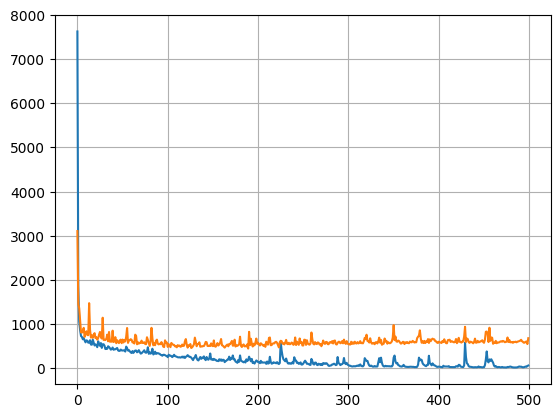

CPU times: user 2min 3s, sys: 31.7 s, total: 2min 35s
Wall time: 1min 35s


In [5]:
%%time
test_results={} 

#Simple nn to forcast crop yeild. Input: 10-vec (longitude, latitude, n-8, n-7, ... n-1)
#                                 Output: 1-vec prediction for year n

train_dataset = y_data.sample(frac=0.8, random_state=0)
test_dataset = y_data.drop(train_dataset.index)
#sns.pairplot(train[x_labels], diag_kind='kde')

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_dataset.pop("2017")
test_labels = test_dataset.pop("2017")

model = tf.keras.Sequential(
    [layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)]
)

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.001))



history = model.fit(train_features.iloc[:,:9], train_labels, verbose=1, epochs=500, validation_split=0.2)

print(history.history.keys())

plt.plot(history.history['loss'], label="Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.grid()
plt.show()
